In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [1]:
dataset_path = "data.pkl"
print(dataset_path)

data.pkl


In [3]:
import pickle
with open(dataset_path, 'rb') as file:
    data = pickle.load(file)

In [4]:
(train_imgs, train_labels), (test_imgs, test_labels) = data

train_imgs = train_imgs.astype('float32') / 255.0
test_imgs = test_imgs.astype('float32') / 255.0

print(f"Training images shape: {train_imgs.shape}")
print(f"Training labels shape: {train_labels.shape}")
print(f"Test images shape: {test_imgs.shape}")
print(f"Test labels shape: {test_labels.shape}")

Training images shape: (5728, 256, 256, 3)
Training labels shape: (5728,)
Test images shape: (1432, 256, 256, 3)
Test labels shape: (1432,)


In [5]:
class_names = ['ashfaq', 'khalid', 'rifat', 'shafin']

In [6]:
from sklearn.model_selection import train_test_split

train_imgs, val_imgs, train_labels, val_labels = train_test_split(train_imgs, train_labels, test_size=0.2, random_state=42)

In [7]:
print(f"Training images shape: {train_imgs.shape}")
print(f"Training labels shape: {train_labels.shape}")
print(f"Validation images shape: {val_imgs.shape}")
print(f"Validation labels shape: {val_labels.shape}")

Training images shape: (4582, 256, 256, 3)
Training labels shape: (4582,)
Validation images shape: (1146, 256, 256, 3)
Validation labels shape: (1146,)


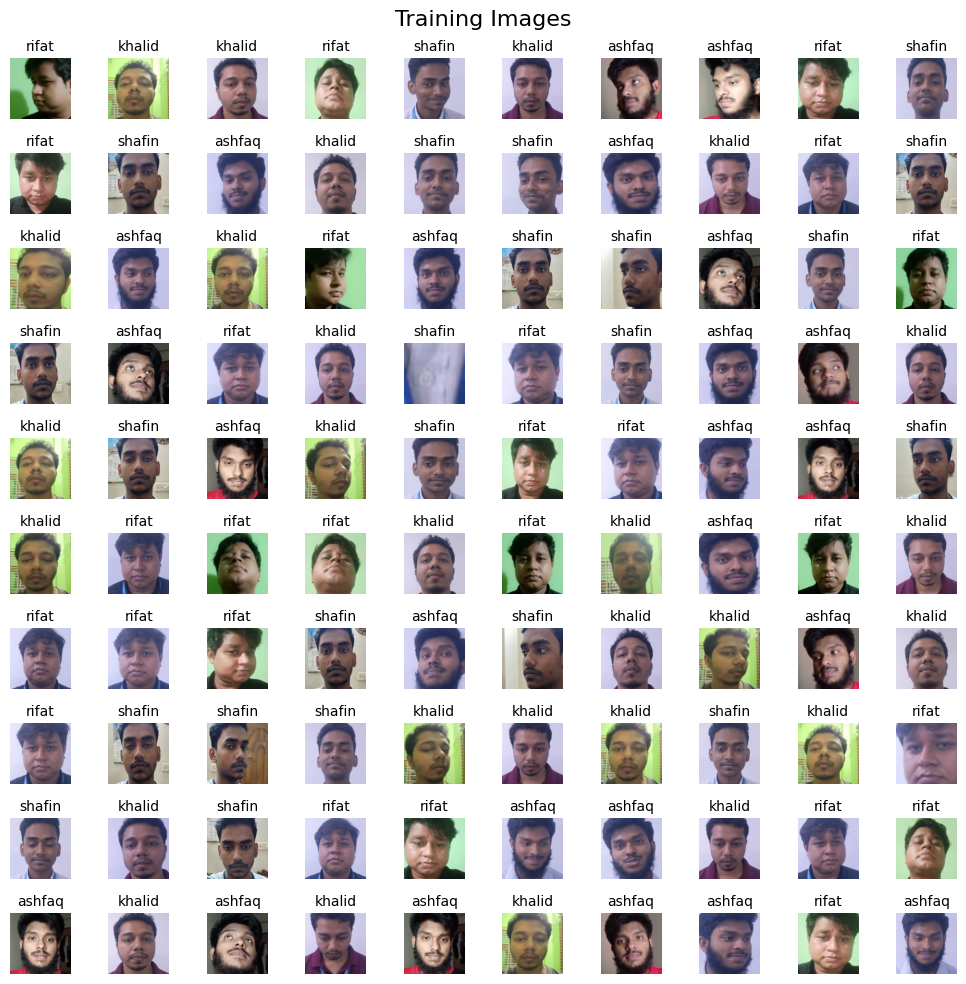

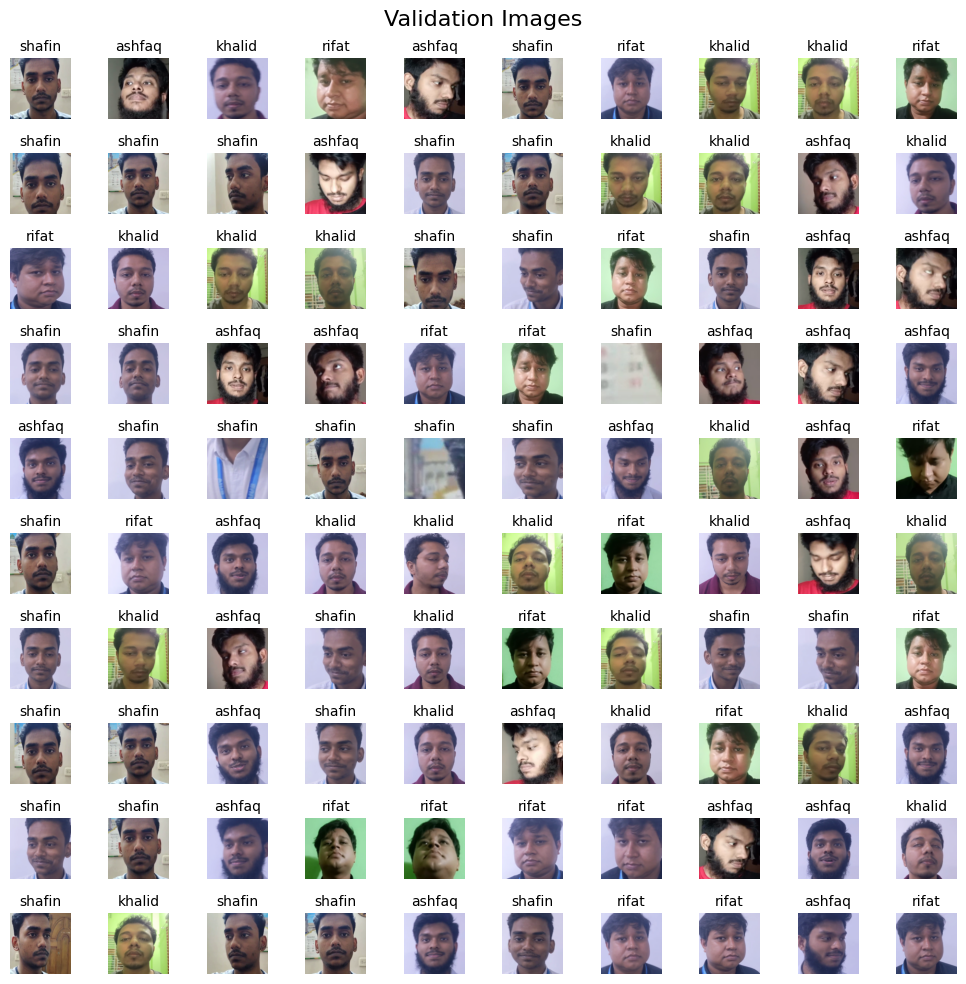

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_images(images, labels, title, class_names=None, num_images=100):
    grid_size = int(np.sqrt(num_images))
    
    idxs = np.random.choice(len(images), num_images, replace=False)
    selected_images = images[idxs]
    selected_labels = labels[idxs]

    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        plt.subplot(grid_size, grid_size, i + 1)
        plt.imshow(selected_images[i])
        plt.axis('off')

        if class_names:
            plt.title(class_names[selected_labels[i]], fontsize=10)
        else:
            plt.title(selected_labels[i], fontsize=10)
    
    plt.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()

plot_images(train_imgs, train_labels, title="Training Images", class_names=class_names)
plot_images(val_imgs, val_labels, title="Validation Images", class_names=class_names)


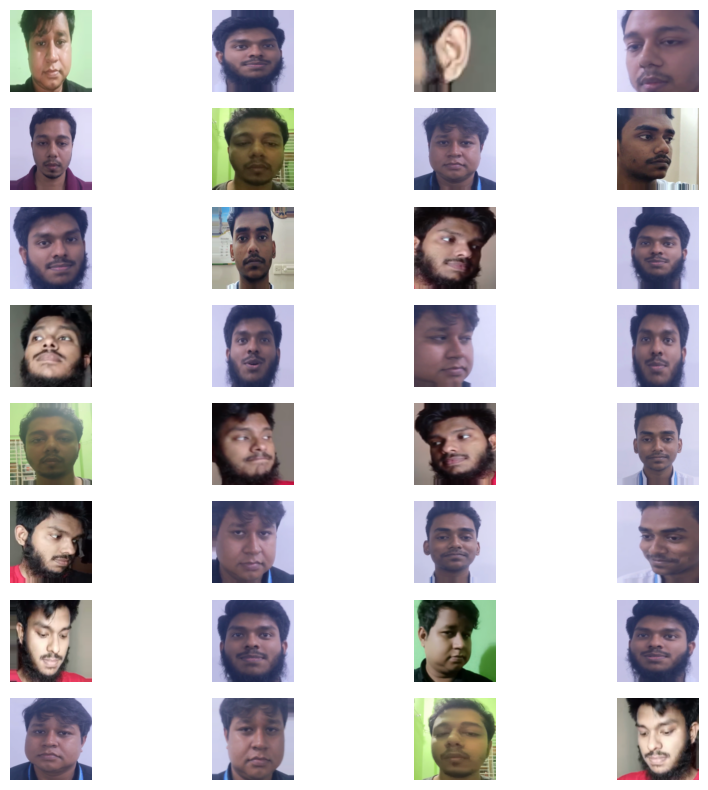

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
datagen.fit(train_imgs)

# Generate a batch of augmented images from the datagen
augmented_images, _ = next(datagen.flow(train_imgs, train_labels, batch_size=32)) 

plt.figure(figsize=(10, 10)) 

for i in range(32):
    plt.subplot(8, 4, i + 1)  
    plt.imshow(augmented_images[i])
    plt.axis('off') 

plt.show()

In [ ]:
from tensorflow.keras import models, layers, regularizers

model = models.Sequential([
    # Input Layer
    layers.Input(shape=(256, 256, 3)),

    # First Convolution Block
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.BatchNormalization(),

    # Second Convolution Block
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.BatchNormalization(),

    # Third Convolution Block
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.BatchNormalization(),

    # Global Average Pooling and Dense Layers
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.5),
    layers.Dense(4, activation='softmax')  # 4 classes
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,172 (434.27 KB)

 Trainable params: 110,724 (432.52 KB)

 Non-trainable params: 448 (1.75 KB)

In [11]:
from tensorflow.keras.optimizers import Adam
model.compile(
    optimizer=Adam(learning_rate=1e-4), 
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(
    datagen.flow(train_imgs, train_labels, batch_size=64),
    epochs=100,
    validation_data=(val_imgs, val_labels),
    callbacks=[early_stopping],
)

Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1733628463.662611      93 service.cc:145] XLA service 0x79ada0012f20 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1733628463.662674      93 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1733628463.662680      93 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


 1/72 ━━━━━━━━━━━━━━━━━━━━ 28:12 24s/step - accuracy: 0.1406 - loss: 2.9289

I0000 00:00:1733628479.122533      93 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


72/72 ━━━━━━━━━━━━━━━━━━━━ 88s 900ms/step - accuracy: 0.5270 - loss: 2.3847 - val_accuracy: 0.2967 - val_loss: 2.6271
Epoch 2/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 57s 720ms/step - accuracy: 0.8841 - loss: 1.7168 - val_accuracy: 0.2766 - val_loss: 2.6590
Epoch 3/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 57s 717ms/step - accuracy: 0.9347 - loss: 1.4731 - val_accuracy: 0.2827 - val_loss: 2.7010
Epoch 4/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 57s 717ms/step - accuracy: 0.9454 - loss: 1.3280 - val_accuracy: 0.3517 - val_loss: 2.5916
Epoch 5/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 57s 724ms/step - accuracy: 0.9665 - loss: 1.1849 - val_accuracy: 0.5497 - val_loss: 2.2067
Epoch 6/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 57s 711ms/step - accuracy: 0.9716 - loss: 1.0885 - val_accuracy: 0.6117 - val_loss: 1.8124
Epoch 7/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 57s 718ms/step - accuracy: 0.9775 - loss: 0.9959 - val_accuracy: 0.8639 - val_loss: 1.3388
Epoch 8/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 58s 727ms/step - accuracy: 0.9829 - loss: 0.9029 - val_accuracy

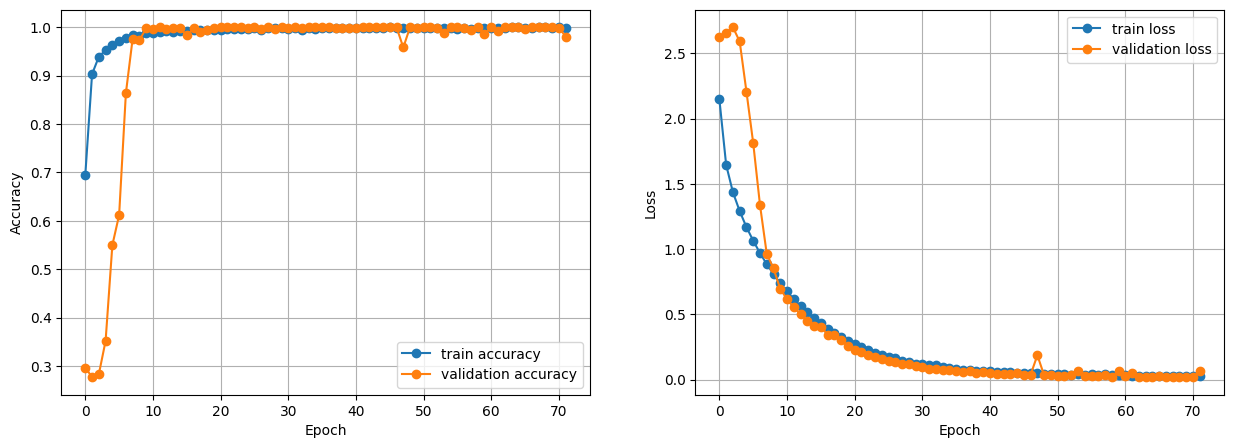

In [13]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], 'o-', label='train accuracy')
plt.plot(history.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], 'o-', label='train loss')
plt.plot(history.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [14]:
test_loss, test_acc = model.evaluate(test_imgs, test_labels)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - accuracy: 1.0000 - loss: 0.0187

Test Accuracy: 1.0

Test Loss: 0.018578944727778435


In [15]:
predictions = model.predict(test_imgs)

45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step


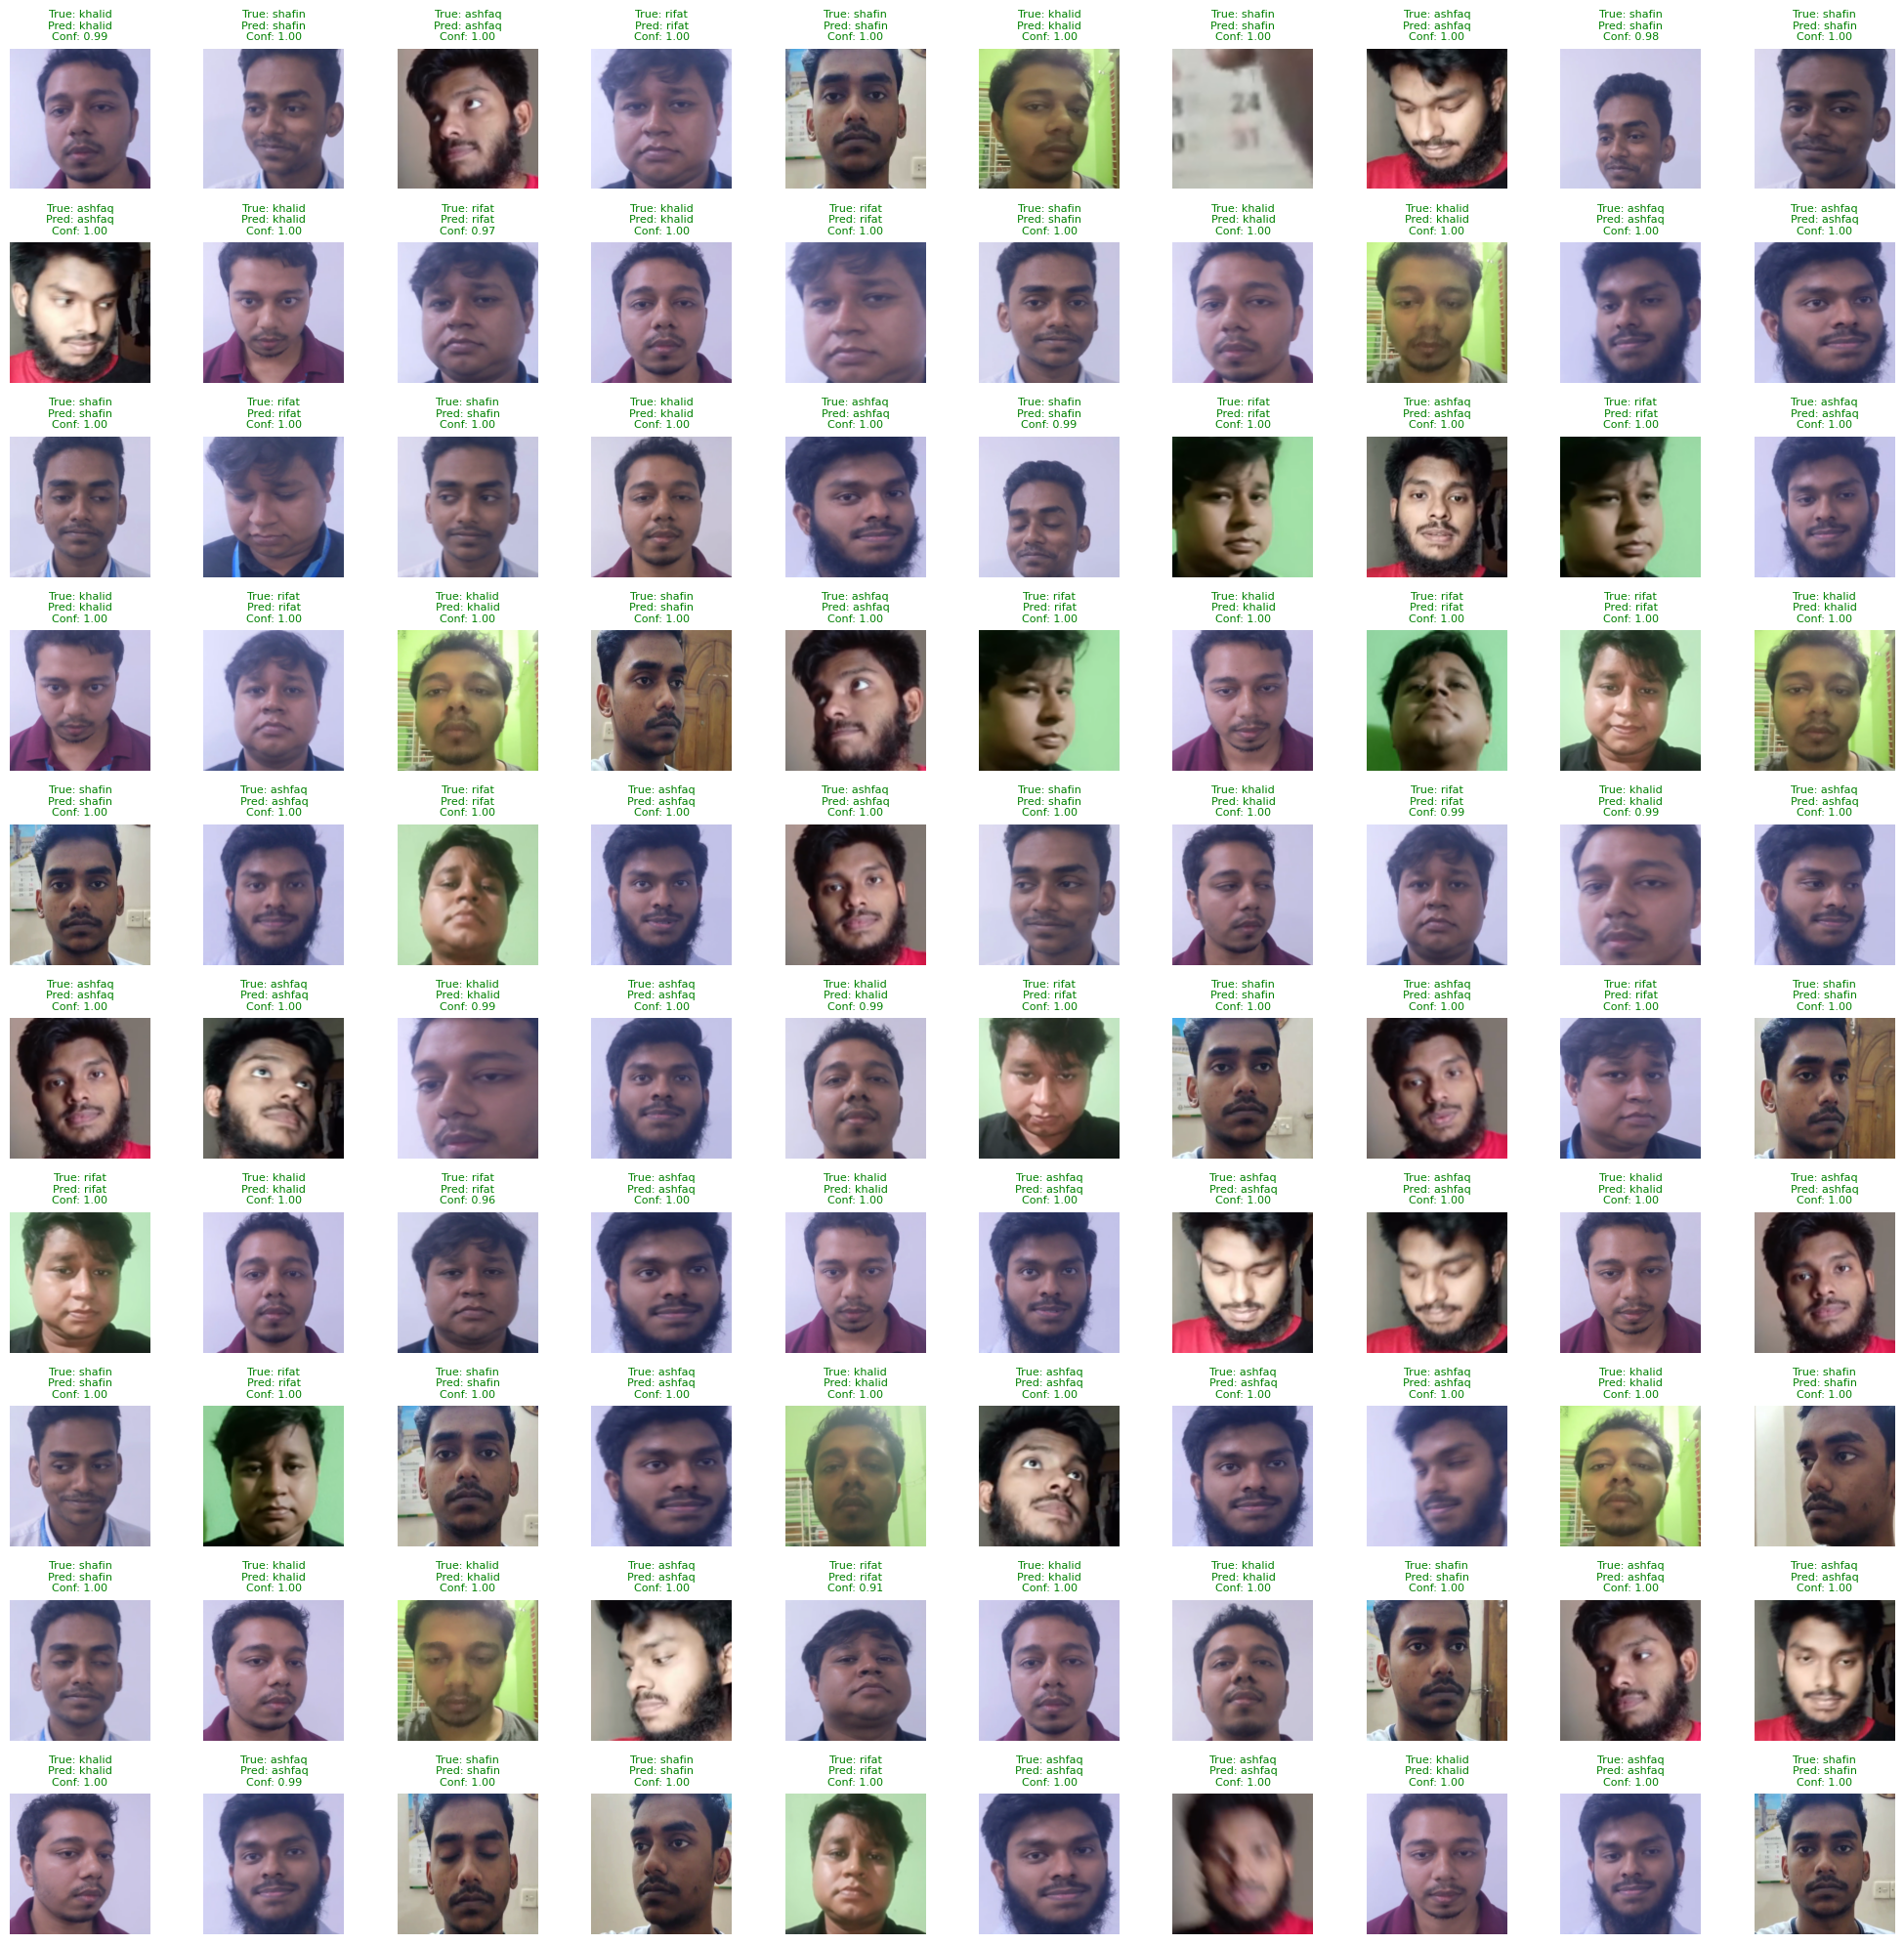

In [ ]:
predicted_classes = np.argmax(predictions, axis=1)
confidence_levels = np.max(predictions, axis=1)

fig, axes = plt.subplots(10, 10, figsize=(20, 20))  
axes = axes.ravel()  

for i in range(100):  
    axes[i].imshow(test_imgs[i]) 
    axes[i].axis('off')  

    true_label = class_names[test_labels[i]]
    predicted_label = class_names[predicted_classes[i]]
    confidence = confidence_levels[i]

    color = "green" if predicted_classes[i] == test_labels[i] else "red"

    axes[i].set_title(f"True: {true_label}\nPred: {predicted_label}\nConf: {confidence:.2f}", color=color, fontsize=8)

plt.tight_layout()
plt.show()


In [ ]:
model.save('face_recognition_model.keras')

In [ ]:
with open('class_labels.pkl', 'wb') as file:
    pickle.dump(class_names, file)